In [5]:
import matplotlib.pyplot as plt
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.__version__)

2.15.0


In [6]:

import keras_ocr
import cv2
import tensorflow as tf

print(keras_ocr.__version__, cv2.__version__, tf.__version__)

0.9.3 4.9.0 2.15.0


In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Looking for /home/main/.keras-ocr/craft_mlt_25k.h5
Looking for /home/main/.keras-ocr/crnn_kurapan.h5


2024-02-26 17:42:27.917681: W tensorflow/core/kernels/gpu_utils.cc:54] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.
2024-02-26 17:42:27.934172: W tensorflow/core/kernels/conv_ops_gpu.cc:322] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 3
in_depths: 64
out_depths: 64
in: 2048
in: 1310
filter: 3
filter: 3
filter: 64
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 1
padding: 1
dtype: DT_FLOAT
group_count: 1
device_identifier: "sm_8.9 with 8325824512B RAM, 24 cores, 2250000KHz clock, 8001000KHz mem clock, 33554432B L2$"
version: 3



5/5 [==============================] - 3s 86ms/step


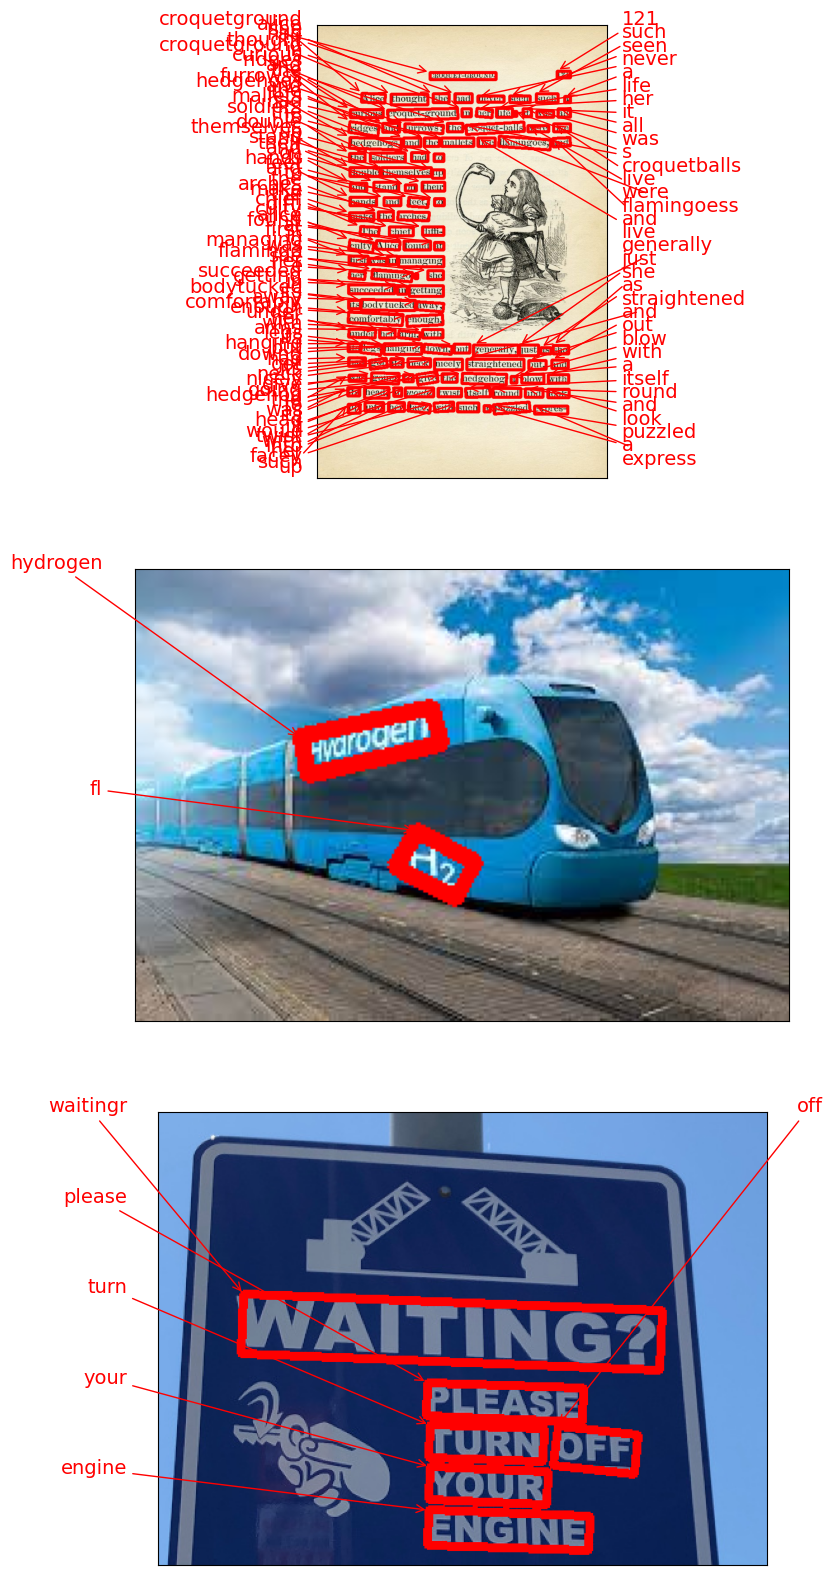

In [8]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()
# print(pipeline)
# Get a set of three example images
images = [
    keras_ocr.tools.read(url) for url in [
        '../data/imgs/1544e7364df53ffa7fbc8e4a70d6bfc8.jpg',
        '../data/imgs/images.jpeg',
        '../data/imgs/sign_small.jpg'
    ]
]

# print(images[0])

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

In [9]:
detector = keras_ocr.detection.Detector()
detector.model.summary()

Looking for /home/main/.keras-ocr/craft_mlt_25k.h5
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 basenet.slice1.0 (Conv2D)   (None, None, None, 64)       1792      ['input_11[0][0]']            
                                                                                                  
 basenet.slice1.1 (BatchNor  (None, None, None, 64)       256       ['basenet.slice1.0[0][0]']    
 malization)                                                                                      
                                                                                                  
 basenet.slice1.2 (Activati  (None, None

In [10]:
prediction_groups

[[('121',
   array([[542., 104.],
          [572., 104.],
          [572., 119.],
          [542., 119.]], dtype=float32)),
  ('croquetground',
   array([[255., 107.],
          [404., 107.],
          [404., 123.],
          [255., 123.]], dtype=float32)),
  ('alice',
   array([[101.222084, 154.55939 ],
          [154.57245 , 156.39905 ],
          [153.87292 , 176.68527 ],
          [100.52256 , 174.84561 ]], dtype=float32)),
  ('she',
   array([[262., 155.],
          [298., 155.],
          [298., 175.],
          [262., 175.]], dtype=float32)),
  ('had',
   array([[311., 155.],
          [350., 155.],
          [350., 175.],
          [311., 175.]], dtype=float32)),
  ('such',
   array([[495., 155.],
          [544., 155.],
          [544., 175.],
          [495., 175.]], dtype=float32)),
  ('thought',
   array([[167., 156.],
          [250., 156.],
          [250., 180.],
          [167., 180.]], dtype=float32)),
  ('seen',
   array([[435., 160.],
          [481., 160.],
        

In [15]:
det = detector.detect([images[1]])
det

1/1 [==============================] - 2s 2s/step


[array([[[ 69.29413 ,  71.176476],
         [122.94119 ,  57.764717],
         [126.7059  ,  72.82354 ],
         [ 73.05884 ,  86.2353  ]],
 
        [[110.      , 112.      ],
         [136.      , 112.      ],
         [136.      , 134.      ],
         [110.      , 134.      ]]], dtype=float32)]

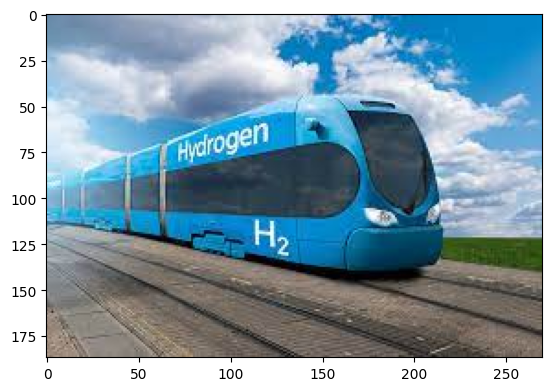

In [17]:
plt.imshow(images[1])